In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

import warnings

def ignore_warn(*arfs, **kwargs):
    pass

warnings.warn = ignore_warn

In [2]:
data = pd.read_csv('data.csv')
l_train = len(data[data['SalePrice'].notnull()])
train = data[:l_train]
y = train['SalePrice']
X = train.drop('SalePrice', axis=1).values

In [3]:
def scoring(model):
    r = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    score = -r
    return score

clf = Lasso(alpha=0.0005)
score = scoring(clf)
print('偏差: {:.4f}({:.4f})'.format(score.mean(), score.std()))

偏差: 0.0121(0.0013)


In [4]:
clf = Lasso(alpha=0.0005)
clf.fit(X, y)
print('特征总数: %d' % len(data.columns))
print('嵌入式选择后，保留特征数: %d' % np.sum(clf.coef_ != 0))

特征总数: 367
嵌入式选择后，保留特征数: 120


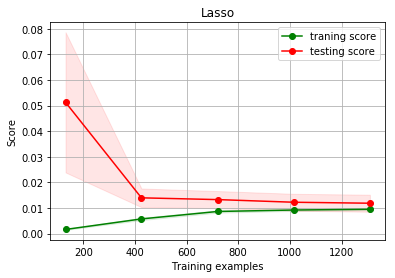

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline


def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):  # 定义 plot_learning_curve 函数绘制学习曲线
    plt.figure()
    plt.title(title)  # 图片标题
    plt.xlabel('Training examples')  # 横坐标
    plt.ylabel('Score')  # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring="neg_mean_squared_error",
                                                            train_sizes=train_sizes)  # 交叉验证法计算训练误差，测试误差
    train_scores_mean = np.mean(-train_scores, axis=1)  # 计算训练误差平均值
    train_scores_std = np.std(-train_scores, axis=1)  # 训练误差方差
    test_scores_mean = np.mean(-test_scores, axis=1)  # 测试误差平均值
    test_scores_std = np.std(-test_scores, axis=1)  # 测试误差方差
    plt.grid()  # 增加网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g')  # 颜色填充
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')  # 颜色填充
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score')  # 绘制训练误差曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score')  # 绘制测试误差曲线
    plt.legend(loc='best')
    return plt


clf = Lasso(alpha=0.0005)
g = plot_learning_curve(clf, 'Lasso', X, y)  # 调用 plot_learning_curve 绘制学习曲线

In [6]:
clf = Lasso(alpha=0.0005)  # 参数设置
clf.fit(X, y)
test = data[l_train:].drop('SalePrice', axis=1).values  # 测试集数据
predict = np.exp(clf.predict(test))  # 预测
result = pd.DataFrame()
result['SalePrice'] = predict
result.to_csv('submission.csv', index=False)  # 将结果写入 submission.csv